# SVR Model
- Training a model to learn the correlation between the different data and then deploying it to predict a salary.

# 0. Importing the Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Importing the Data set

In [27]:
# 1. Importing the data set
data_set = pd.read_csv('Position_Salaries.csv')

# 2. Localizing the features
X = data_set.iloc[:, 1:-1].values

# 3. localizing the dependent Variables
Y = data_set.iloc[:, -1].values

In [28]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [29]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Reshaping Y into a 2D array, this is because later the fit_transform() will expect a 2D array as it's input

In [30]:
# Ths Standard scaler class always expect a 2D array as it input.
# Therefore we will Transform the 1D y array in 2D 
Y = Y.reshape(len(Y), 1)        # It takes the row and column we want to have as shape.
                                # The row should the shape of Y and the column of 1 i.e. ...
                                #... we want to have 1 col.umn.

print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# 2. Feature Scaling
We're going to apply feature scaling because : <br>
- We do not have an explicit equation 
- And we don't have coefficient multiplying each of the features
Therefor not compensating for lower values of the features taking high values.

This time the SVR Model has an Implicit equation of the dependent variable with respect to the features, so we don't have such<br>
such coefficient, so we will definitely have to apply feature scaling for this model

- Here we will apply future scaling on the whole matrix of features X and the dependent variable Y, because the Dependent<br>
  Variable is not in the **range between 0 and 1.** and also because as the **salary is much higher than the future**, therefor the <br>
  the **feature might be neglected by the model**, if we don' apply feature scaling.
- Feature Scaling will put all variable on the same scale.
- Feature scaling should be apply after the the split.
- Feature scaling should be applied on data which are already on the same scale and on One-Hot encoding

In [31]:
from sklearn.preprocessing import  StandardScaler


# We're not going to use the same standardScaler on both the matrix of feature X and dependent Variable Y.
# ... This is because X and Y do not have the same mean and std for levels and salary respectively, therefor..
# ... we have to create 2 different standardScaler object, one that will be fitted to X and the other to Y.

# 1. Applying the feature scaling to the matrix of feature X.
sc_X = StandardScaler()          # will compute the mean and std
X = sc_X.fit_transform(X)        # Fit_transform will assign the mean and std to X

# 1. Applying the feature scaling on the dependent Variable Y.
sc_Y = StandardScaler()          # will compute the mean and std
Y = sc_Y.fit_transform(Y)        # Fit_transform will assign the mean and std to Y

In [32]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [33]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# 3. Training the SVR ont the whole dataset
We will ot split our data into training ad test set because we want to leverage the maximum  data to learn this correlation <br>
between those position levels and salary. Therefore we have to train the SVR Mode on the whole dataset.

- All SVM Kernel
  
  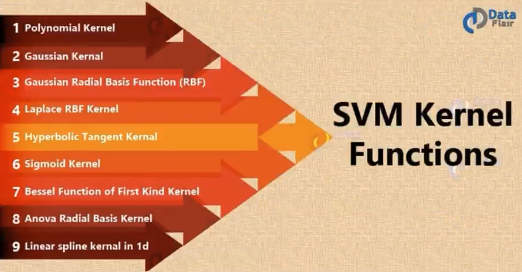 <br>

In [34]:
# 1. Importing the SVR Model
from sklearn.svm import SVR

# 2. Building our Model and and then storing it in the class object, and choosing an SVM kernel
regressor = SVR(kernel= 'rbf')

# 3. Training our model on the whole data set using the fit() method, in order to learn the correlation 
# ... between the salary and Position.
regressor.fit(X, Y)   # X and Y as Parameter

c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# 4. Predicting a new Result
We will predict the position of 6.5 and compare it with the position of the polynomial regression model.

In [ ]:
# 1. Predicting the new value from our model, using the predict() method
# regressor.predict(sc_X.transform[[6.5]])        

# 2. Since the output Y was scaled, in order to get the prediction in terms of std, ...
# ... we must apply a reverse scaling to that whole prediction using the method inverse_transform() in order to obtain back our salary.
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))        # reShape(-1,1) is used To avoid FORMAT error
                                                                                        # predict() expect any input as 2D scaled array value.
                                                                                        # We always call our model  to do a prediction

array([[170370.0204065]])

# Visualizing the the SVR Result
We will visualize the result on low resolution

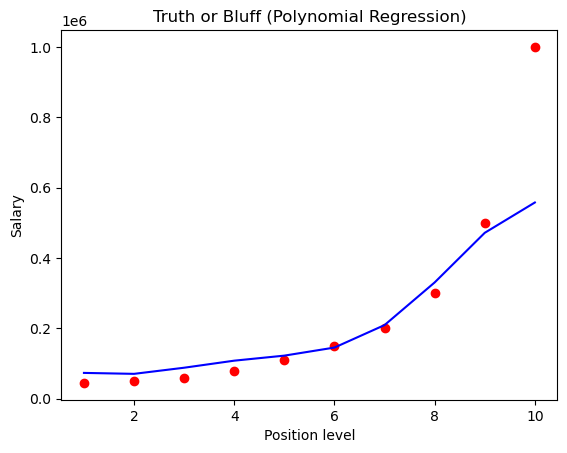

In [36]:
# 1. Calling the scatter function from plt module, in order to display the different point/coordinate....
#... containing the result. i.e. 
# plotting salary against Position level

# reverse the scale of x and y, in order to have the original value back
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red') 

# 2. Plotting the Polynomial regression line 
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)) , color = 'blue')  # As Parameter:    b0, b1x1 and b2x1^2  in X_poly
                                                                           # we  can't keep X since X is the matrix of feature..
                                                                           # ... of single level, therefore we have to transform..
                                                                           # ... X to the different Powers i.e. b0, b1x1, b2x^2                               
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

# 3. visualizing the Graph by using the show() function
plt.show()

# Visualizing the SVR (for higher resolution and smoother curve)

C:\Users\user\AppData\Local\Temp\ipykernel_14376\364767534.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


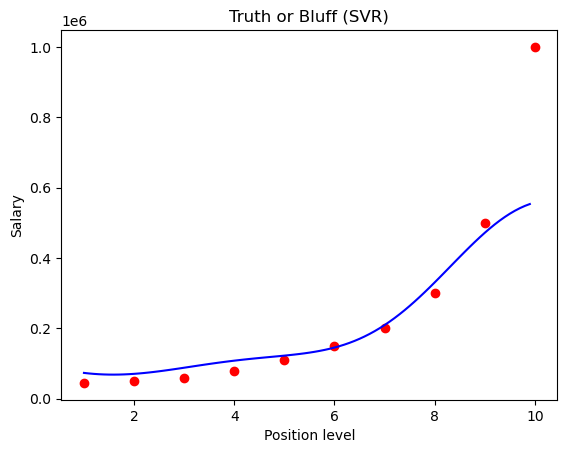

In [ ]:
# For the purpose of having a much more beautiful polynomial
# 1. Calling the scatter function from plt module, in order to display the different point/coordinate....
#... containing the result. i.e. 
# plotting salary against Position level
# reverse the scaling
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)           
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red' )

# 2. Plotting the SV regression line 
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')  # Applying the predict method on X_grid scale
                                                            # we have to scale x_grid so that predict() method can predict in the right format
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')

# 3. visualizing the Graph by using the show() function
plt.show()